<a href="https://colab.research.google.com/github/hassantariq64/crud/blob/master/Media%2BCompany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Media Company Case Study

Problem Statement: A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.

In [46]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
#Importing dataset
media = pd.read_csv('mediacompany.csv')
media = media.drop('Unnamed: 7',axis = 1)

In [48]:
#Let's explore the top 5 rows
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [49]:
# Converting date to Pandas datetime format
media['Date'] = pd.to_datetime(media['Date'])


In [50]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [60]:
from datetime import date

media['day']= media.Date


In [61]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2017-03-01,2
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2017-03-02,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,2017-03-03,2
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,2017-03-04,2
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,2017-03-05,2


In [62]:
# Cleaning days
media['day'] = media['day'].astype(str)
media['day'] = media['day'].map(lambda x: x[0:2])
media['day'] = media['day'].astype(int)

In [63]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,20,2
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,20,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,20,2
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,20,2
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,20,2


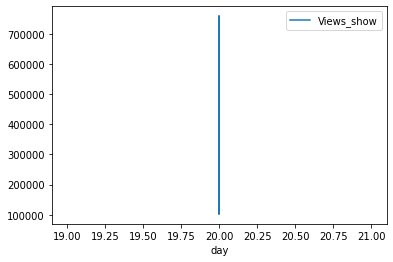

In [64]:
# days vs Views_show
media.plot.line(x='day', y='Views_show')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


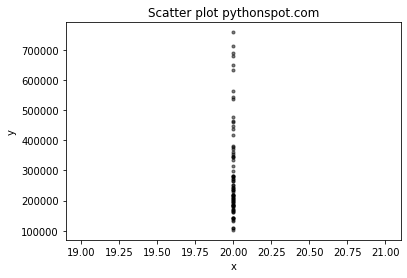

In [65]:
# Scatter Plot (days vs Views_show)
colors = (0,0,0)
area = np.pi*3
plt.scatter(media.day, media.Views_show, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

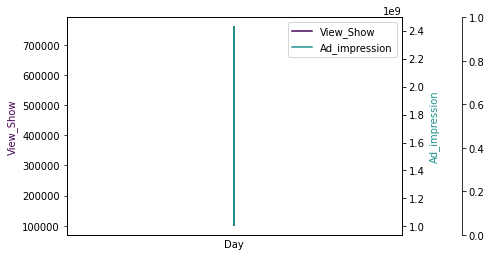

In [67]:
# plot for days vs Views_show and days vs Ad_impressions

fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("View_Show")
par1.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(media.day,media.Views_show, color=color1,label="View_Show")
p2, = par1.plot(media.day,media.Ad_impression,color=color2, label="Ad_impression")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

In [68]:
# Derived Metrics
# Weekdays are taken such that 1 corresponds to Sunday and 7 to Saturday
# Generate the weekday variable
media['weekday'] = (media['day']+3)%7
media.weekday.replace(0,7, inplace=True)
media['weekday'] = media['weekday'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,20,2
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,20,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,20,2
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,20,2
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,20,2


#### Running first model (lm1) Weekday & visitors 

In [69]:
# Putting feature variable to X
X = media[['Visitors','weekday']]

# Putting response variable to y
y = media['Views_show']

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [72]:
# fit the model to the training data
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     31.33
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           3.12e-07
Time:                        10:04:33   Log-Likelihood:                -1055.6
No. Observations:                  80   AIC:                             2115.
Df Residuals:                      78   BIC:                             2120.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Visitors       0.3588      0.064      5.597      0.0

In [74]:
# create Weekend variable, with value 1 at weekends and 0 at weekdays
def cond(i):
    if i % 7 == 5: return 1
    elif i % 7 == 4: return 1
    else :return 0
    return i

media['weekend']=[cond(i) for i in media['day']]

In [75]:
media.head()


,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,20,2,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,20,2,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,20,2,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,20,2,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,20,2,0


#### Running second model (lm2) visitors & weekend

In [76]:
# Putting feature variable to X
X = media[['Visitors','weekend']]

# Putting response variable to y
y = media['Views_show']

In [77]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     31.33
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           3.12e-07
Time:                        10:04:50   Log-Likelihood:                -1055.6
No. Observations:                  80   AIC:                             2115.
Df Residuals:                      78   BIC:                             2120.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.197e+05    1.1e+05     -2.909      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


#### Running third model (lm3) visitors, weekend & Character_A

In [78]:
# Putting feature variable to X
X = media[['Visitors','weekend','Character_A']]

# Putting response variable to y
y = media['Views_show']

In [79]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_3 = sm.OLS(y,X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     22.70
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           1.78e-08
Time:                        10:04:55   Log-Likelihood:                -1050.5
No. Observations:                  80   AIC:                             2107.
Df Residuals:                      77   BIC:                             2114.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.795e+05   1.05e+05     -2.672      

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [80]:
# Create lag variable
media['Lag_Views'] = np.roll(media['Views_show'], 1)
media.Lag_Views.replace(108961,0, inplace=True)

In [81]:
media.head(10)


,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,20,2,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,20,2,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,20,2,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,20,2,0,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,20,2,0,240061
5,2017-03-06,342997,1330689,1742540,1140228426,0,0,20,2,0,446314
6,2017-03-07,227313,1363579,1821742,1113811802,0,0,20,2,0,342997
7,2017-03-08,180313,1353483,1795456,1083475096,0,0,20,2,0,227313
8,2017-03-09,178800,1345428,1794157,1067636147,0,0,20,2,0,180313
9,2017-03-10,201180,1344540,1834967,1081234843,0,0,20,2,0,178800


#### Running fourth model (lm4) visitors, Character_A, Lag_views & weekend

In [82]:
# Putting feature variable to X
X = media[['Visitors','Character_A','Lag_Views','weekend']]

# Putting response variable to y
y = media['Views_show']

In [83]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_4 = sm.OLS(y,X).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     19.11
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           2.48e-09
Time:                        10:05:08   Log-Likelihood:                -1046.6
No. Observations:                  80   AIC:                             2101.
Df Residuals:                      76   BIC:                             2111.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.042e+05   1.01e+05     -3.023      

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


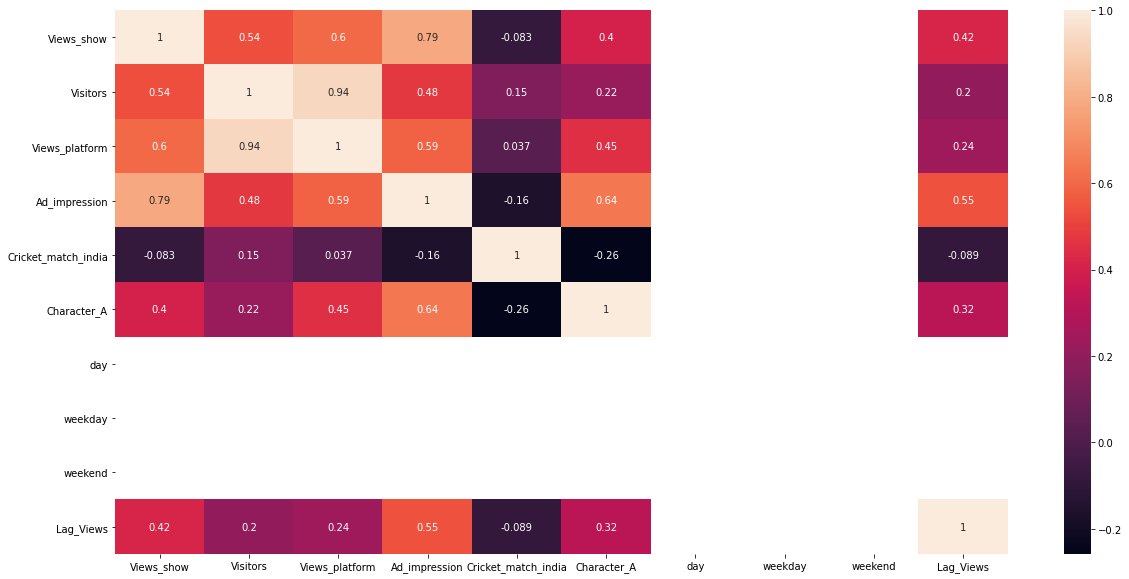

In [84]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(media.corr(),annot = True)

#### Running fifth model (lm5) Character_A, weekend & Views_platform

In [85]:
# Putting feature variable to X
X = media[['weekend','Character_A','Views_platform']]

# Putting response variable to y
y = media['Views_show']

In [86]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_5 = sm.OLS(y,X).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     24.22
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           6.93e-09
Time:                        10:05:20   Log-Likelihood:                -1049.5
No. Observations:                  80   AIC:                             2105.
Df Residuals:                      77   BIC:                             2112.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.567e+05   1.14e+05     -3.

#### Running sixth model (lm6) Character_A, weekend & Visitors

In [87]:
# Putting feature variable to X
X = media[['weekend','Character_A','Visitors']]

# Putting response variable to y
y = media['Views_show']

In [88]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_6 = sm.OLS(y,X).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     22.70
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           1.78e-08
Time:                        10:05:25   Log-Likelihood:                -1050.5
No. Observations:                  80   AIC:                             2107.
Df Residuals:                      77   BIC:                             2114.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.795e+05   1.05e+05     -2.672      

#### Running seventh model (lm7) Character_A, weekend, Visitors & Ad_impressions

In [89]:
# Putting feature variable to X
X = media[['weekend','Character_A','Visitors','Ad_impression']]

# Putting response variable to y
y = media['Views_show']

In [90]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_7 = sm.OLS(y,X).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     49.86
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           6.41e-18
Time:                        10:05:35   Log-Likelihood:                -1025.6
No. Observations:                  80   AIC:                             2059.
Df Residuals:                      76   BIC:                             2069.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.013e+05   8.18e+04     -6.131

#### Running eight model (lm8) Character_A, weekend & Ad_impressions

In [91]:
# Putting feature variable to X
X = media[['weekend','Character_A','Ad_impression']]

# Putting response variable to y
y = media['Views_show']

In [92]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_8 = sm.OLS(y,X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     67.18
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           1.31e-17
Time:                        10:05:43   Log-Likelihood:                -1028.7
No. Observations:                  80   AIC:                             2063.
Df Residuals:                      77   BIC:                             2071.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.631e+05   6.19e+04     -5.862

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [93]:
#Ad impression in million
media['ad_impression_million'] = media['Ad_impression']/1000000

#### Running seventh model (lm7) Character_A, weekend, Visitors, ad_impressions_million & Cricket_match_india

In [94]:
# Putting feature variable to X
X = media[['weekend','Character_A','ad_impression_million','Cricket_match_india']]

# Putting response variable to y
y = media['Views_show']

In [96]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_9 = sm.OLS(y,X).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     44.27
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           1.18e-16
Time:                        10:06:06   Log-Likelihood:                -1028.6
No. Observations:                  80   AIC:                             2065.
Df Residuals:                      76   BIC:                             2075.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.646e+

#### Running seventh model (lm7) Character_A, weekend & ad_impressions_million

In [98]:
# Putting feature variable to X
X = media[['weekend','Character_A','ad_impression_million']]

# Putting response variable to y
y = media['Views_show']

In [100]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_10 = sm.OLS(y,X).fit()
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     67.18
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           1.31e-17
Time:                        10:06:25   Log-Likelihood:                -1028.7
No. Observations:                  80   AIC:                             2063.
Df Residuals:                      77   BIC:                             2071.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.631e+

#### Making predictions using lm10

In [101]:
# Making predictions using the model
X = media[['weekend','Character_A','ad_impression_million']]
X = sm.add_constant(X)
Predicted_views = lm_10.predict(X)

In [102]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show, Predicted_views)
r_squared = r2_score(media.Views_show, Predicted_views)

In [103]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 8635014983.870035
r_square_value : 0.6356768452724489


Text(0, 0.5, 'Views')

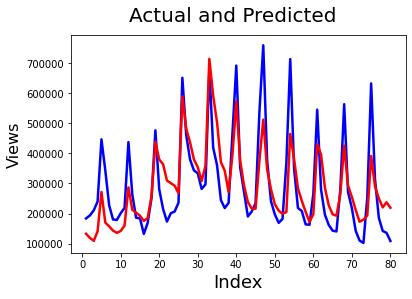

In [104]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

Text(0, 0.5, 'Views_show-Predicted_views')

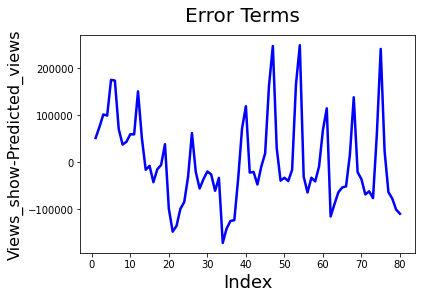

In [105]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

#### Making predictions using lm6

In [106]:
# Making predictions using the model
X = media[['weekend','Character_A','Visitors']]
X = sm.add_constant(X)
Predicted_views = lm_6.predict(X)

In [107]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show, Predicted_views)
r_squared = r2_score(media.Views_show, Predicted_views)

In [108]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 14910928178.389465
r_square_value : 0.3708874386420463


Text(0, 0.5, 'Views')

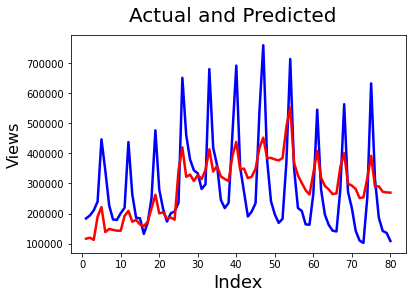

In [109]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

Text(0, 0.5, 'Views_show-Predicted_views')

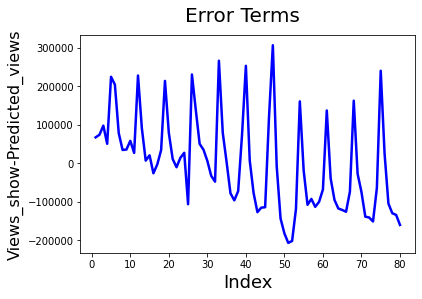

In [111]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label